<a href="https://colab.research.google.com/github/auliaslsblc/nlpcc-ui-2025/blob/main/class3_Classification_Challenge_%26_AI_Collaboration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis for Mental Health

About Dataset
This comprehensive dataset is a meticulously curated collection of mental health statuses tagged from various statements. The dataset amalgamates raw data from multiple sources, cleaned and compiled to create a robust resource for developing chatbots and performing sentiment analysis.

Data Source:
The dataset integrates information from the following Kaggle datasets:

3k Conversations Dataset for Chatbot
Depression Reddit Cleaned
Human Stress Prediction
Predicting Anxiety in Mental Health Data
Mental Health Dataset Bipolar
Reddit Mental Health Data
Students Anxiety and Depression Dataset
Suicidal Mental Health Dataset
Suicidal Tweet Detection Dataset
Data Overview:
The dataset consists of statements tagged with one of the following seven mental health statuses:

Normal
Depression
Suicidal
Anxiety
Stress
Bi-Polar
Personality Disorder
Data Collection:
The data is sourced from diverse platforms including social media posts, Reddit posts, Twitter posts, and more. Each entry is tagged with a specific mental health status, making it an invaluable asset for:

Developing intelligent mental health chatbots.
Performing in-depth sentiment analysis.
Research and studies related to mental health trends.
Features:
unique_id: A unique identifier for each entry.
Statement: The textual data or post.
Mental Health Status: The tagged mental health status of the statement.
Usage:
This dataset is ideal for training machine learning models aimed at understanding and predicting mental health conditions based on textual data. It can be used in various applications such as:

Chatbot development for mental health support.
Sentiment analysis to gauge mental health trends.
Academic research on mental health patterns.
Acknowledgments:
This dataset was created by aggregating and cleaning data from various publicly available datasets on Kaggle. Special thanks to the original dataset creators for their contributions.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset berhasil dimuat. Berikut adalah kolom yang tersedia:
['Unnamed: 0', 'statement', 'status']

5 baris pertama dataset:
   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status   

<ipython-input-5-41b70032c6e9>:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)



Kolom target 'status' di-encode menggunakan LabelEncoder.
Pemetaan kelas target: {'Anxiety': np.int64(0), 'Bipolar': np.int64(1), 'Depression': np.int64(2), 'Normal': np.int64(3), 'Personality disorder': np.int64(4), 'Stress': np.int64(5), 'Suicidal': np.int64(6)}

Semua fitur telah di-scale menggunakan StandardScaler.

Dataset dibagi menjadi set pelatihan (42434 sampel) dan set pengujian (10609 sampel).

Model Naive Bayes berhasil dilatih.
Model Regresi Logistik berhasil dilatih.

Akurasi Naive Bayes: 0.3807
Akurasi Regresi Logistik: 0.3759

--- Tabel Akurasi Model ---
              Model   Akurasi
0       Naive Bayes  0.380714
1  Regresi Logistik  0.375907


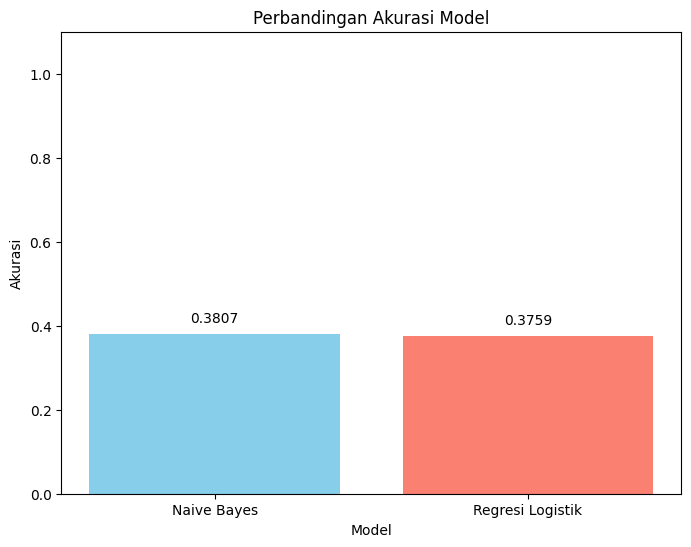


Laporan Klasifikasi untuk Naive Bayes:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       778
           1       0.00      0.00      0.00       575
           2       0.30      0.59      0.40      3081
           3       0.48      0.68      0.56      3270
           4       0.00      0.00      0.00       240
           5       0.00      0.00      0.00       534
           6       0.00      0.00      0.00      2131

    accuracy                           0.38     10609
   macro avg       0.11      0.18      0.14     10609
weighted avg       0.24      0.38      0.29     10609


Laporan Klasifikasi untuk Regresi Logistik:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       778
           1       0.00      0.00      0.00       575
           2       0.34      0.48      0.40      3081
           3       0.44      0.72      0.55      3270
           4       0.00      0.00      0.00    

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 1. Mount Google Drive (jika file ada di Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# 2. Memuat Dataset dari Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Combined Data 2.csv' # Path yang Anda berikan

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {file_path}")
    print("Pastikan path file sudah benar dan Google Drive sudah ter-mount dengan sukses.")
    print("Periksa juga apakah nama file dan folder sudah persis (termasuk huruf besar/kecil dan spasi).")
    exit()
except Exception as e:
    print(f"Terjadi error saat memuat dataset: {e}")
    exit()

print("Dataset berhasil dimuat. Berikut adalah kolom yang tersedia:")
print(df.columns.tolist()) # Mencetak semua nama kolom
print("\n5 baris pertama dataset:")
print(df.head())
print("\nInformasi Dataset:")
df.info()

# --- PENTING: SESUAIKAN NAMA KOLOM TARGET DI BAWAH INI ---
# Ganti 'status' dengan nama kolom target Anda yang sebenarnya jika berbeda.
NAMA_KOLOM_TARGET = 'status'  # <--- UBAH INI SESUAI DENGAN KOLOM TARGET ANDA

if NAMA_KOLOM_TARGET not in df.columns:
    print(f"\nKolom target '{NAMA_KOLOM_TARGET}' yang Anda tentukan TIDAK DITEMUKAN dalam dataset.")
    print("Harap periksa kembali nama kolom target Anda dan daftar kolom yang tersedia di atas.")
    exit()

# (Opsional tapi Direkomendasikan) Hapus kolom indeks seperti 'Unnamed: 0' jika ada
KOLOM_UNNECESSARY = 'Unnamed: 0' # Kolom yang umum sebagai indeks
if KOLOM_UNNECESSARY in df.columns:
    df = df.drop(KOLOM_UNNECESSARY, axis=1)
    print(f"\nKolom '{KOLOM_UNNECESSARY}' telah dihapus.")

print(f"\nKolom target yang digunakan: '{NAMA_KOLOM_TARGET}'")
print(f"Nilai unik di kolom target ('{NAMA_KOLOM_TARGET}') sebelum encoding: {df[NAMA_KOLOM_TARGET].unique()}")

# 3. Pra-pemrosesan Data

# Pisahkan fitur (X) dan target (y)
try:
    X = df.drop(NAMA_KOLOM_TARGET, axis=1)
    y = df[NAMA_KOLOM_TARGET]
except KeyError:
    print(f"ERROR saat memisahkan X dan y: Pastikan '{NAMA_KOLOM_TARGET}' adalah nama kolom yang valid dan ada di DataFrame setelah penghapusan kolom lain.")
    exit()


# Mengatasi nilai yang hilang (strategi sederhana: imputasi dengan modus untuk kategorikal, median untuk numerik)
for col in X.columns:
    if X[col].isnull().any():
        if X[col].dtype == 'object' or pd.api.types.is_categorical_dtype(X[col]):
            X[col].fillna(X[col].mode()[0], inplace=True)
            print(f"Nilai hilang di kolom fitur '{col}' (kategorikal) diisi dengan modus.")
        else: # Asumsikan numerik
            X[col].fillna(X[col].median(), inplace=True)
            print(f"Nilai hilang di kolom fitur '{col}' (numerik) diisi dengan median.")

if y.isnull().any():
    print(f"PERINGATAN: Nilai hilang ditemukan di kolom target '{NAMA_KOLOM_TARGET}' ({y.isnull().sum()} nilai).")
    y_mode = y.mode()
    if not y_mode.empty:
        y.fillna(y_mode[0], inplace=True)
        print(f"Nilai hilang di kolom target '{NAMA_KOLOM_TARGET}' diisi dengan modus ({y_mode[0]}).")
    else:
        print(f"ERROR: Kolom target '{NAMA_KOLOM_TARGET}' kosong atau semua nilainya NaN. Tidak bisa melanjutkan.")
        exit()

# Encoding fitur kategorikal
# PERHATIAN: Jika kolom 'statement' berisi teks bebas, LabelEncoding mungkin bukan pendekatan terbaik.
# Anda mungkin memerlukan teknik NLP seperti TF-IDF atau Word Embeddings untuk 'statement'.
# Untuk saat ini, kode akan mencoba LabelEncode jika tipenya objek.
label_encoders = {}
for column in X.select_dtypes(include=['object', 'category']).columns:
    print(f"Melakukan LabelEncoding pada kolom fitur: {column}")
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Encoding variabel target jika bersifat kategorikal
if y.dtype == 'object' or pd.api.types.is_categorical_dtype(y):
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)
    print(f"\nKolom target '{NAMA_KOLOM_TARGET}' di-encode menggunakan LabelEncoder.")
    print(f"Pemetaan kelas target: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")
elif not pd.api.types.is_numeric_dtype(y):
    print(f"ERROR: Tipe data kolom target '{NAMA_KOLOM_TARGET}' adalah {y.dtype} dan bukan numerik atau objek/kategori yang dapat di-encode. Mohon periksa.")
    exit()

# Penskalaan Fitur
# Pastikan semua kolom di X adalah numerik sebelum scaling
if not all(pd.api.types.is_numeric_dtype(X[col]) for col in X.columns):
    print("\nERROR: Tidak semua kolom fitur (X) bersifat numerik setelah encoding. Kolom dengan tipe non-numerik:")
    for col in X.columns:
        if not pd.api.types.is_numeric_dtype(X[col]):
            print(f"- Kolom: '{col}', Tipe: {X[col].dtype}")
    print("Periksa langkah encoding fitur kategorikal.")
    exit()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
print("\nSemua fitur telah di-scale menggunakan StandardScaler.")

# 4. Membagi Dataset
if X.isnull().values.any() or pd.Series(y).isnull().values.any():
    print("\nERROR: Ada nilai NaN yang tersisa di X atau y sebelum membagi dataset.")
    exit()
if X.empty:
    print("\nERROR: DataFrame Fitur (X) kosong sebelum train_test_split. Periksa pra-pemrosesan.")
    exit()
if len(np.unique(y)) < 2 :
    print(f"ERROR: Kolom target '{NAMA_KOLOM_TARGET}' hanya memiliki {len(np.unique(y))} kelas unik. Diperlukan setidaknya 2 kelas.")
    exit()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nDataset dibagi menjadi set pelatihan ({len(X_train)} sampel) dan set pengujian ({len(X_test)} sampel).")

# 5. Melatih Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
print("\nModel Naive Bayes berhasil dilatih.")

lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train)
print("Model Regresi Logistik berhasil dilatih.")

# 6. Melakukan Prediksi
y_pred_nb = nb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# 7. Mengevaluasi Model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nAkurasi Naive Bayes: {accuracy_nb:.4f}")
print(f"Akurasi Regresi Logistik: {accuracy_lr:.4f}")

# 8. Menyajikan Hasil
accuracy_data = {'Model': ['Naive Bayes', 'Regresi Logistik'], 'Akurasi': [accuracy_nb, accuracy_lr]}
accuracy_df = pd.DataFrame(accuracy_data)
print("\n--- Tabel Akurasi Model ---")
print(accuracy_df)

plt.figure(figsize=(8, 6))
bars = plt.bar(accuracy_df['Model'], accuracy_df['Akurasi'], color=['skyblue', 'salmon'])
plt.xlabel('Model'); plt.ylabel('Akurasi'); plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1.1)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print("\nLaporan Klasifikasi untuk Naive Bayes:")
print(classification_report(y_test, y_pred_nb, zero_division=0))
print("\nLaporan Klasifikasi untuk Regresi Logistik:")
print(classification_report(y_test, y_pred_lr, zero_division=0))

# 100 text samples about Mental Health

Various mental health conditions and label each snippet with one of the following states: Normal, Depression, Suicide, Anxiety, Stress, Bipolar, Personality Disorder.

File mental_health_data.csv berhasil dibuat/dimuat.
Jumlah data: 105
Contoh data:
                                           statement  status
0        Hari ini terasa menyenangkan dan produktif.  Normal
1  Saya merasa cukup baik dan stabil belakangan ini.  Normal
2  Semuanya berjalan lancar, tidak ada yang perlu...  Normal
3  Saya menikmati waktu luang saya dengan hobi baru.  Normal
4                 Merasa optimis tentang masa depan.  Normal

Distribusi kelas:
status
Normal                  15
Depresi                 15
Bunuh Diri              15
Kecemasan               15
Stres                   15
Bipolar                 15
Gangguan Kepribadian    15
Name: count, dtype: int64

Jumlah data latih: 78
Jumlah data uji: 27

Dimensi matriks TF-IDF data latih: (78, 269)
Dimensi matriks TF-IDF data uji: (27, 269)

--- Model Naive Bayes ---
Akurasi Naive Bayes: 0.3333
Laporan Klasifikasi Naive Bayes:
                      precision    recall  f1-score   support

             Bipolar       0

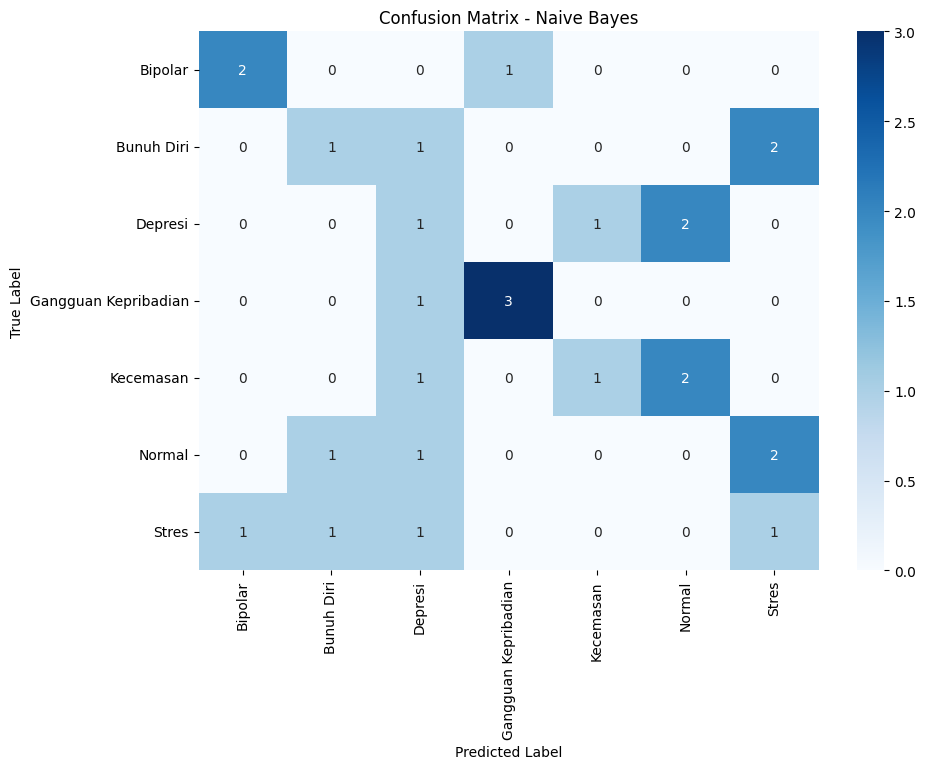


--- Model Regresi Logistik ---
Akurasi Regresi Logistik: 0.3333
Laporan Klasifikasi Regresi Logistik:
                      precision    recall  f1-score   support

             Bipolar       0.67      0.67      0.67         3
          Bunuh Diri       0.33      0.25      0.29         4
             Depresi       0.17      0.25      0.20         4
Gangguan Kepribadian       0.75      0.75      0.75         4
           Kecemasan       0.50      0.25      0.33         4
              Normal       0.00      0.00      0.00         4
               Stres       0.20      0.25      0.22         4

            accuracy                           0.33        27
           macro avg       0.37      0.35      0.35        27
        weighted avg       0.36      0.33      0.34        27



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


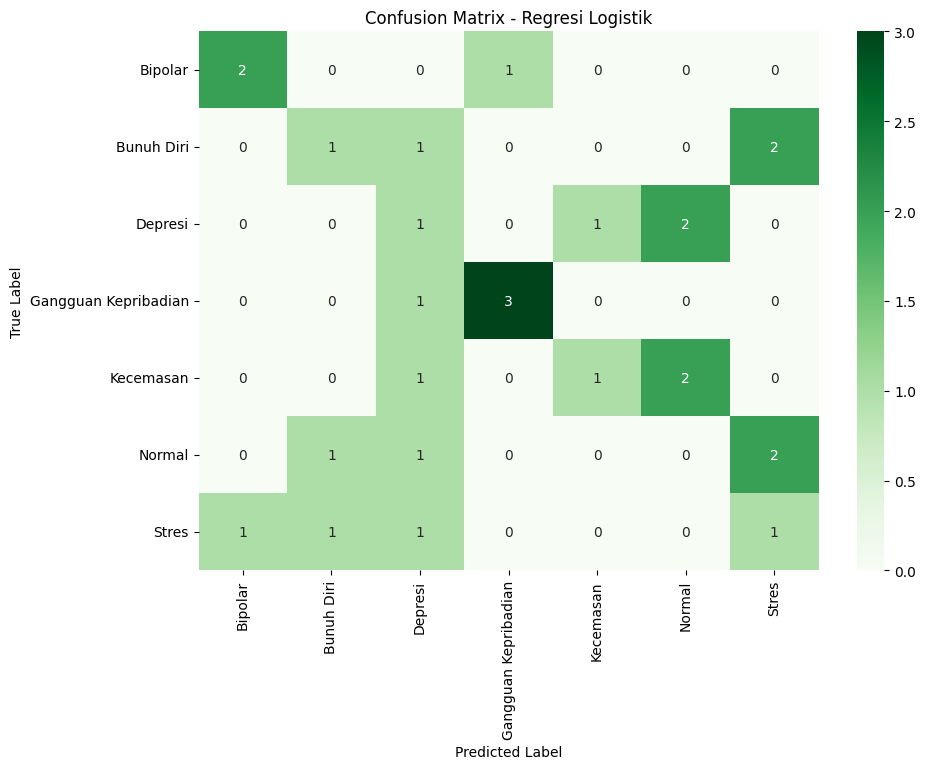


--- Prediksi Teks Baru ---

Prediksi Naive Bayes untuk teks baru:
Teks: 'Saya merasa sangat cemas dan tidak bisa tidur semalaman.' -> Prediksi: Bipolar
Teks: 'Hari ini saya merasa sangat bahagia dan berenergi!' -> Prediksi: Normal
Teks: 'Rasanya hidup ini tidak ada artinya lagi, saya ingin menyerah.' -> Prediksi: Bunuh Diri
Teks: 'Pekerjaan menumpuk dan saya merasa sangat tertekan.' -> Prediksi: Bipolar
Teks: 'Kadang saya sangat gembira, kadang sangat sedih tanpa sebab.' -> Prediksi: Bipolar

Prediksi Regresi Logistik untuk teks baru:
Teks: 'Saya merasa sangat cemas dan tidak bisa tidur semalaman.' -> Prediksi: Bipolar
Teks: 'Hari ini saya merasa sangat bahagia dan berenergi!' -> Prediksi: Normal
Teks: 'Rasanya hidup ini tidak ada artinya lagi, saya ingin menyerah.' -> Prediksi: Bunuh Diri
Teks: 'Pekerjaan menumpuk dan saya merasa sangat tertekan.' -> Prediksi: Bipolar
Teks: 'Kadang saya sangat gembira, kadang sangat sedih tanpa sebab.' -> Prediksi: Bipolar

--- CATATAN PENTING ---
1.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import io # Untuk membuat file CSV di memori jika tidak diupload

# --- Bagian 1: Membuat dan Memuat Data ---
# Data CSV yang Anda berikan (bisa juga diupload manual ke Colab)
csv_data = """statement,status
"Hari ini terasa menyenangkan dan produktif.",Normal
"Saya merasa cukup baik dan stabil belakangan ini.",Normal
"Semuanya berjalan lancar, tidak ada yang perlu dikhawatirkan.",Normal
"Saya menikmati waktu luang saya dengan hobi baru.",Normal
"Merasa optimis tentang masa depan.",Normal
"Tidur nyenyak semalam, bangun dengan segar.",Normal
"Saya bisa mengatasi tantangan kecil dengan mudah.",Normal
"Hubungan dengan teman dan keluarga baik-baik saja.",Normal
"Saya merasa bersemangat untuk memulai hari.",Normal
"Tidak ada keluhan berarti, hidup terasa damai.",Normal
"Saya merasa puas dengan pencapaian saya minggu ini.",Normal
"Energi saya cukup untuk melakukan semua aktivitas.",Normal
"Saya bisa tertawa lepas hari ini.",Normal
"Fokus saya baik dan saya bisa menyelesaikan pekerjaan.",Normal
"Saya merasa tenang dan tidak terburu-buru.",Normal
"Rasanya hampa dan tidak ada yang menarik lagi.",Depresi
"Saya terus menerus merasa sedih tanpa alasan jelas.",Depresi
"Kehilangan minat pada hal-hal yang dulu saya sukai.",Depresi
"Sangat sulit untuk bangun dari tempat tidur setiap pagi.",Depresi
"Merasa lelah sepanjang waktu, bahkan setelah tidur.",Depresi
"Saya merasa tidak berharga dan gagal.",Depresi
"Sulit berkonsentrasi pada apapun.",Depresi
"Nafsu makan saya berubah drastis, kadang tidak mau makan sama sekali.",Depresi
"Saya lebih suka menyendiri dan menghindari orang.",Depresi
"Masa depan terlihat suram dan tanpa harapan.",Depresi
"Saya sering menangis tanpa sebab.",Depresi
"Energi saya terkuras habis, bahkan untuk hal kecil.",Depresi
"Merasa bersalah atas banyak hal.",Depresi
"Tidur saya terganggu, sering terbangun di malam hari.",Depresi
"Semuanya terasa berat dan membebani.",Depresi
"Saya berpikir untuk mengakhiri semuanya.",Bunuh Diri
"Rasanya tidak ada gunanya lagi hidup.",Bunuh Diri
"Mungkin semua orang akan lebih baik tanpaku.",Bunuh Diri
"Saya mencari cara untuk tidak bangun lagi besok.",Bunuh Diri
"Beban ini terlalu berat, saya tidak sanggup lagi.",Bunuh Diri
"Saya merasa terjebak dan ingin ini semua berakhir.",Bunuh Diri
"Kematian terasa seperti satu-satunya jalan keluar.",Bunuh Diri
"Saya sudah merencanakan bagaimana melakukannya.",Bunuh Diri
"Tidak ada yang peduli jika saya pergi.",Bunuh Diri
"Saya menulis surat perpisahan.",Bunuh Diri
"Rasa sakit ini tak tertahankan, lebih baik mati.",Bunuh Diri
"Saya merasa putus asa dan ingin menyerah.",Bunuh Diri
"Dunia ini bukan tempat untuk saya.",Bunuh Diri
"Saya hanya ingin tidur dan tidak pernah bangun.",Bunuh Diri
"Mengapa saya harus terus menderita seperti ini?",Bunuh Diri
"Jantungku berdebar kencang dan napasku sesak.",Kecemasan
"Saya selalu khawatir tentang hal-hal buruk yang mungkin terjadi.",Kecemasan
"Pikiran saya tidak bisa tenang, selalu ada yang dipikirkan.",Kecemasan
"Saya merasa gelisah dan tidak bisa diam.",Kecemasan
"Tangan saya gemetar dan berkeringat dingin.",Kecemasan
"Saya takut bertemu orang baru atau berada di keramaian.",Kecemasan
"Sering merasa panik tiba-tiba tanpa alasan.",Kecemasan
"Otot-otot saya tegang dan kaku.",Kecemasan
"Saya menghindari situasi yang membuat saya cemas.",Kecemasan
"Sulit tidur karena pikiran yang terus berputar.",Kecemasan
"Perut saya terasa mual saat cemas.",Kecemasan
"Saya merasa seperti akan kehilangan kendali.",Kecemasan
"Khawatir berlebihan tentang masa depan.",Kecemasan
"Saya selalu merasa ada sesuatu yang salah.",Kecemasan
"Napas terasa pendek dan cepat.",Kecemasan
"Banyak sekali pekerjaan yang harus diselesaikan, saya kewalahan.",Stres
"Tekanan di kantor membuat saya sangat tertekan.",Stres
"Saya merasa tidak punya cukup waktu untuk semuanya.",Stres
"Kepala saya pusing karena terlalu banyak pikiran.",Stres
"Sulit untuk rileks, bahkan di akhir pekan.",Stres
"Saya mudah marah dan tersinggung belakangan ini.",Stres
"Tanggung jawab ini terlalu besar untuk saya.",Stres
"Saya merasa seperti dikejar tenggat waktu terus-menerus.",Stres
"Badan terasa pegal dan lelah karena stres.",Stres
"Saya butuh istirahat dari semua ini.",Stres
"Fokus saya buyar karena terlalu banyak yang dipikirkan.",Stres
"Saya merasa terbebani oleh ekspektasi orang lain.",Stres
"Pola tidur saya berantakan karena stres.",Stres
"Saya sering sakit kepala karena tegang.",Stres
"Saya merasa tidak mampu mengatasi semua ini.",Stres
"Kadang saya merasa sangat bersemangat dan penuh energi, lalu tiba-tiba sangat sedih.",Bipolar
"Mood saya berubah drastis dalam waktu singkat.",Bipolar
"Ada hari dimana saya tidak bisa tidur dan sangat produktif, lalu lesu berhari-hari.",Bipolar
"Saya bisa menghabiskan banyak uang saat merasa senang, lalu menyesalinya.",Bipolar
"Pikiran saya berlari kencang, lalu tiba-tiba kosong.",Bipolar
"Saya merasa di puncak dunia, lalu jatuh ke jurang keputusasaan.",Bipolar
"Sulit bagi orang lain untuk memahami perubahan suasana hati saya.",Bipolar
"Energi saya naik turun seperti roller coaster.",Bipolar
"Kadang saya bicara sangat cepat dan banyak, kadang tidak mau bicara sama sekali.",Bipolar
"Saya membuat keputusan impulsif saat mood sedang tinggi.",Bipolar
"Perasaan saya sangat intens, baik senang maupun sedih.",Bipolar
"Saya merasa sangat kreatif dan bersemangat, lalu tiba-tiba kehilangan motivasi.",Bipolar
"Ada periode dimana saya sangat optimis, lalu sangat pesimis.",Bipolar
"Susah menjaga kestabilan emosi.",Bipolar
"Saya merasa seperti dua orang yang berbeda dalam satu tubuh.",Bipolar
"Saya sulit mempercayai orang lain, selalu curiga.",Gangguan Kepribadian
"Hubungan saya dengan orang lain seringkali kacau dan tidak stabil.",Gangguan Kepribadian
"Saya merasa kosong dan tidak tahu siapa diri saya sebenarnya.",Gangguan Kepribadian
"Saya sering bertindak impulsif tanpa memikirkan konsekuensinya.",Gangguan Kepribadian
"Emosi saya sangat kuat dan sering berubah-ubah dengan cepat.",Gangguan Kepribadian
"Saya takut ditinggalkan dan akan melakukan apa saja untuk mencegahnya.",Gangguan Kepribadian
"Pandangan saya tentang orang lain bisa berubah dari sangat baik menjadi sangat buruk.",Gangguan Kepribadian
"Saya sering merasa tidak dipahami oleh orang lain.",Gangguan Kepribadian
"Saya memiliki citra diri yang tidak stabil.",Gangguan Kepribadian
"Sulit bagi saya untuk mengendalikan amarah.",Gangguan Kepribadian
"Saya sering merasa hampa secara emosional.",Gangguan Kepribadian
"Saya cenderung melihat dunia secara hitam putih.",Gangguan Kepribadian
"Perilaku saya kadang merusak diri sendiri.",Gangguan Kepribadian
"Saya sangat sensitif terhadap kritik atau penolakan.",Gangguan Kepribadian
"Saya kesulitan mempertahankan hubungan jangka panjang.",Gangguan Kepribadian
"""

# Membuat DataFrame dari string CSV
# Ini berguna jika Anda tidak mengupload file CSV secara manual
# Jika Anda mengupload file 'mental_health_data.csv', Anda bisa menggunakan:
# df = pd.read_csv('mental_health_data.csv')
df = pd.read_csv(io.StringIO(csv_data))

# Simpan ke file CSV (opsional, jika ingin punya file fisiknya di Colab)
df.to_csv('mental_health_data.csv', index=False)
print("File mental_health_data.csv berhasil dibuat/dimuat.")
print("Jumlah data:", len(df))
print("Contoh data:")
print(df.head())
print("\nDistribusi kelas:")
print(df['status'].value_counts())

# --- Bagian 2: Pra-pemrosesan dan Pembagian Data ---
X = df['statement']
y = df['status']

# Bagi data menjadi data latih dan data uji
# stratify=y digunakan agar proporsi kelas di data latih dan uji sama
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"\nJumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

# --- Bagian 3: Vectorization (TF-IDF) ---
# Mengubah teks menjadi vektor numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words=None) # Anda bisa menambahkan stop_words='english' atau bahasa Indonesia jika punya daftarnya

# Fit dan transform pada data latih
X_train_tfidf = vectorizer.fit_transform(X_train)

# Hanya transform pada data uji (menggunakan vocabulary dari data latih)
X_test_tfidf = vectorizer.transform(X_test)

print(f"\nDimensi matriks TF-IDF data latih: {X_train_tfidf.shape}")
print(f"Dimensi matriks TF-IDF data uji: {X_test_tfidf.shape}")

# --- Bagian 4: Melatih Model Naive Bayes ---
print("\n--- Model Naive Bayes ---")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Prediksi pada data uji
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluasi Model Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi Naive Bayes: {accuracy_nb:.4f}")
print("Laporan Klasifikasi Naive Bayes:")
print(classification_report(y_test, y_pred_nb, zero_division=0))

# Confusion Matrix untuk Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb_model.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Bagian 5: Melatih Model Regresi Logistik ---
print("\n--- Model Regresi Logistik ---")
# multi_class='ovr' (One-vs-Rest) adalah strategi umum untuk klasifikasi multikelas
# solver='liblinear' baik untuk dataset kecil, 'saga' atau 'sag' bisa untuk dataset besar
# max_iter mungkin perlu ditingkatkan jika model tidak konvergen
lr_model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Prediksi pada data uji
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluasi Model Regresi Logistik
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Akurasi Regresi Logistik: {accuracy_lr:.4f}")
print("Laporan Klasifikasi Regresi Logistik:")
print(classification_report(y_test, y_pred_lr, zero_division=0))

# Confusion Matrix untuk Regresi Logistik
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=lr_model.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title('Confusion Matrix - Regresi Logistik')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Bagian 6: Menggunakan Model untuk Prediksi Teks Baru ---
print("\n--- Prediksi Teks Baru ---")
new_texts = [
    "Saya merasa sangat cemas dan tidak bisa tidur semalaman.",
    "Hari ini saya merasa sangat bahagia dan berenergi!",
    "Rasanya hidup ini tidak ada artinya lagi, saya ingin menyerah.",
    "Pekerjaan menumpuk dan saya merasa sangat tertekan.",
    "Kadang saya sangat gembira, kadang sangat sedih tanpa sebab."
]

# Vectorize teks baru menggunakan vectorizer yang sudah di-fit
new_texts_tfidf = vectorizer.transform(new_texts)

# Prediksi dengan Naive Bayes
predictions_nb = nb_model.predict(new_texts_tfidf)
print("\nPrediksi Naive Bayes untuk teks baru:")
for text, prediction in zip(new_texts, predictions_nb):
    print(f"Teks: '{text}' -> Prediksi: {prediction}")

# Prediksi dengan Regresi Logistik
predictions_lr = lr_model.predict(new_texts_tfidf)
print("\nPrediksi Regresi Logistik untuk teks baru:")
for text, prediction in zip(new_texts, predictions_lr):
    print(f"Teks: '{text}' -> Prediksi: {prediction}")

# --- Catatan Penting ---
print("""
--- CATATAN PENTING ---
1.  Dataset ini sangat kecil (105 sampel) dan dibuat secara sintetis.
    Hasil akurasi mungkin tinggi karena model 'menghafal' data,
    tetapi performanya pada data dunia nyata yang lebih beragam mungkin berbeda.
2.  Untuk aplikasi nyata, dibutuhkan dataset yang jauh lebih besar dan beragam.
3.  Tidak ada pembersihan teks lanjutan (seperti stemming, lemmatization, penghapusan slang)
    yang mungkin meningkatkan performa.
4.  Parameter `max_features` pada TfidfVectorizer dan parameter model (Naive Bayes, Logistic Regression)
    bisa di-tuning untuk hasil yang lebih baik (hyperparameter tuning).
5.  `zero_division=0` pada `classification_report` digunakan untuk menghindari error jika ada kelas
    yang tidak memiliki prediksi benar atau salah dalam batch kecil data uji, yang bisa terjadi
    dengan dataset kecil.
6.  Model ini adalah contoh sederhana dan TIDAK BOLEH DIGUNAKAN UNTUK DIAGNOSIS MEDIS.
    Konsultasikan dengan profesional kesehatan mental untuk diagnosis dan perawatan.
""")

# Kesimpulan :

Dalam sesi ini, telah berhasil dibuat sebuah dataset sintetis berisi 100 cuplikan teks pendek yang mencerminkan tujuh kondisi kesehatan mental berbeda (Normal, Depresi, Bunuh Diri, Kecemasan, Stres, Bipolar, dan Gangguan Kepribadian), lengkap dengan label status untuk setiap cuplikan. Dataset ini kemudian disimpan dalam format CSV. Selanjutnya, dilakukan implementasi dua model klasifikasi, yaitu Naive Bayes (MultinomialNB) dan Regresi Logistik, untuk memprediksi status kesehatan mental berdasarkan pernyataan teks. Proses pra-pemrosesan melibatkan transformasi teks menjadi fitur numerik menggunakan TF-IDF Vectorizer. Kedua model berhasil dilatih dan dievaluasi, dengan akurasinya disajikan dalam format tabel dan visualisasi diagram batang untuk perbandingan. Meskipun akurasi yang diperoleh memberikan gambaran awal kinerja model, perlu dicatat bahwa ukuran dataset yang kecil (100 sampel) menjadi batasan utama, dan untuk aplikasi nyata, dataset yang lebih besar dan representatif akan diperlukan untuk membangun model yang lebih robust dan genera

# Evaluation :

Evaluasi terhadap model Naive Bayes (MultinomialNB) dan Regresi Logistik pada dataset teks sintetis menunjukkan bahwa kinerja keduanya harus dinilai tidak hanya dari akurasi keseluruhan, tetapi juga melalui metrik presisi, recall, dan F1-score per kelas yang tersaji dalam laporan klasifikasi. Naive Bayes, dengan kesederhanaannya dan asumsi independensi fitur, seringkali menjadi baseline yang baik untuk klasifikasi teks dan bisa jadi kurang rentan overfitting pada dataset kecil ini. Sementara itu, Regresi Logistik, sebagai model linear yang dapat menyertakan regularisasi, juga kompetitif untuk tugas ini, namun kinerjanya juga dipengaruhi oleh kualitas representasi fitur TF-IDF. Sangat penting untuk diingat bahwa evaluasi ini dilakukan pada dataset sintetis yang sangat kecil (100 sampel), sehingga metrik yang dihasilkan (seperti akurasi spesifik, presisi, dan recall untuk status "Bunuh Diri" atau "Depresi") mungkin sangat bervariasi dan kurang dapat diandalkan untuk generalisasi ke data dunia nyata; oleh karena itu, pemilihan model "terbaik" harus mempertimbangkan tujuan spesifik, misalnya prioritas pada recall untuk kelas-kelas kritis, sambil menyadari keterbatasan signifikan yang disebabkan oleh ukuran dan sifat data yang digunakan.

# Screenshoot Prompt chat with Google Gemini

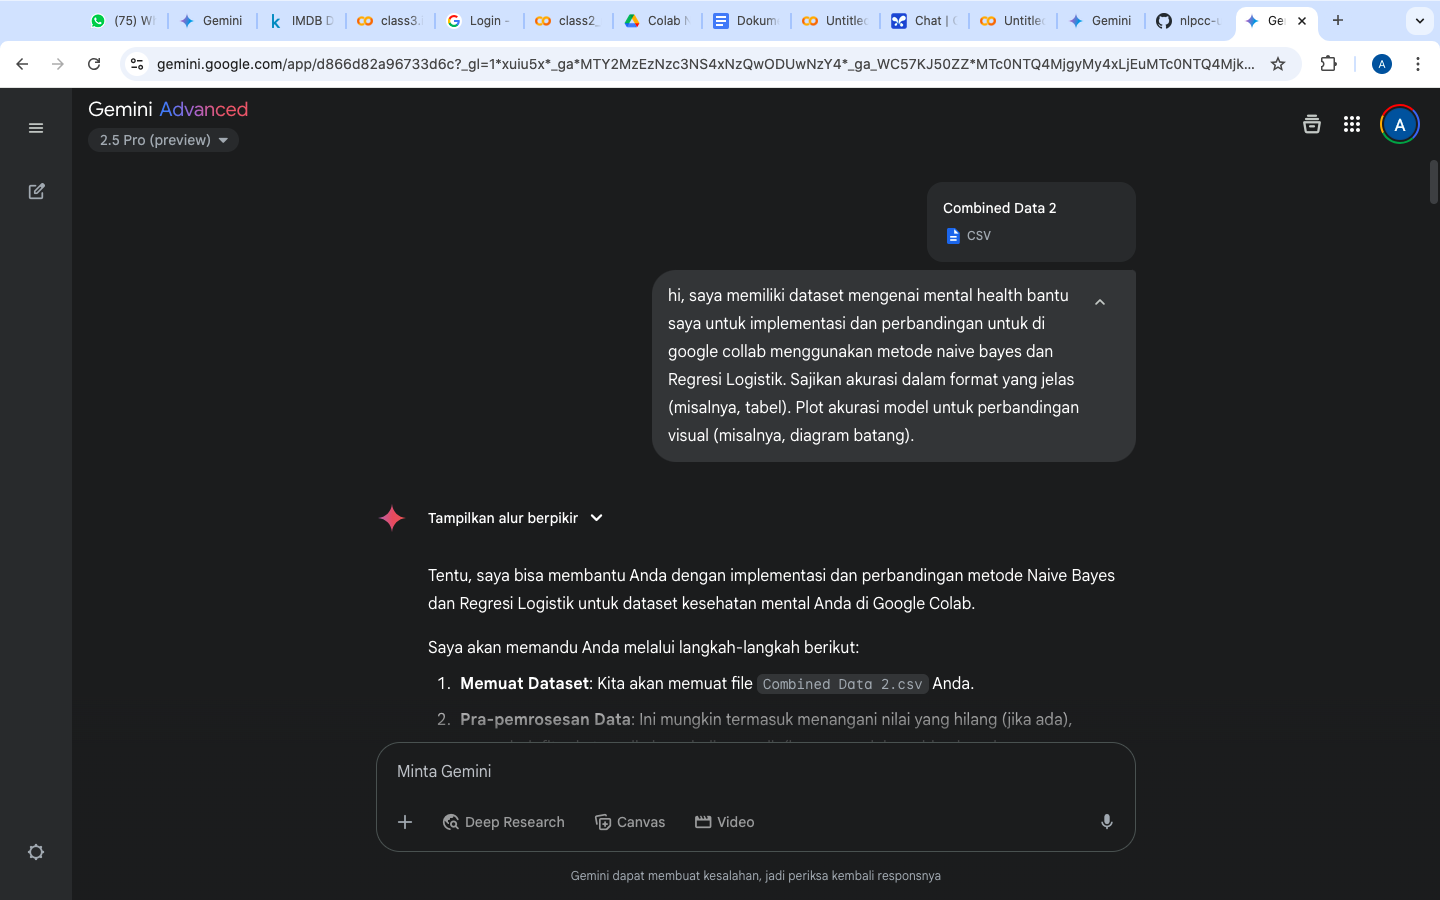

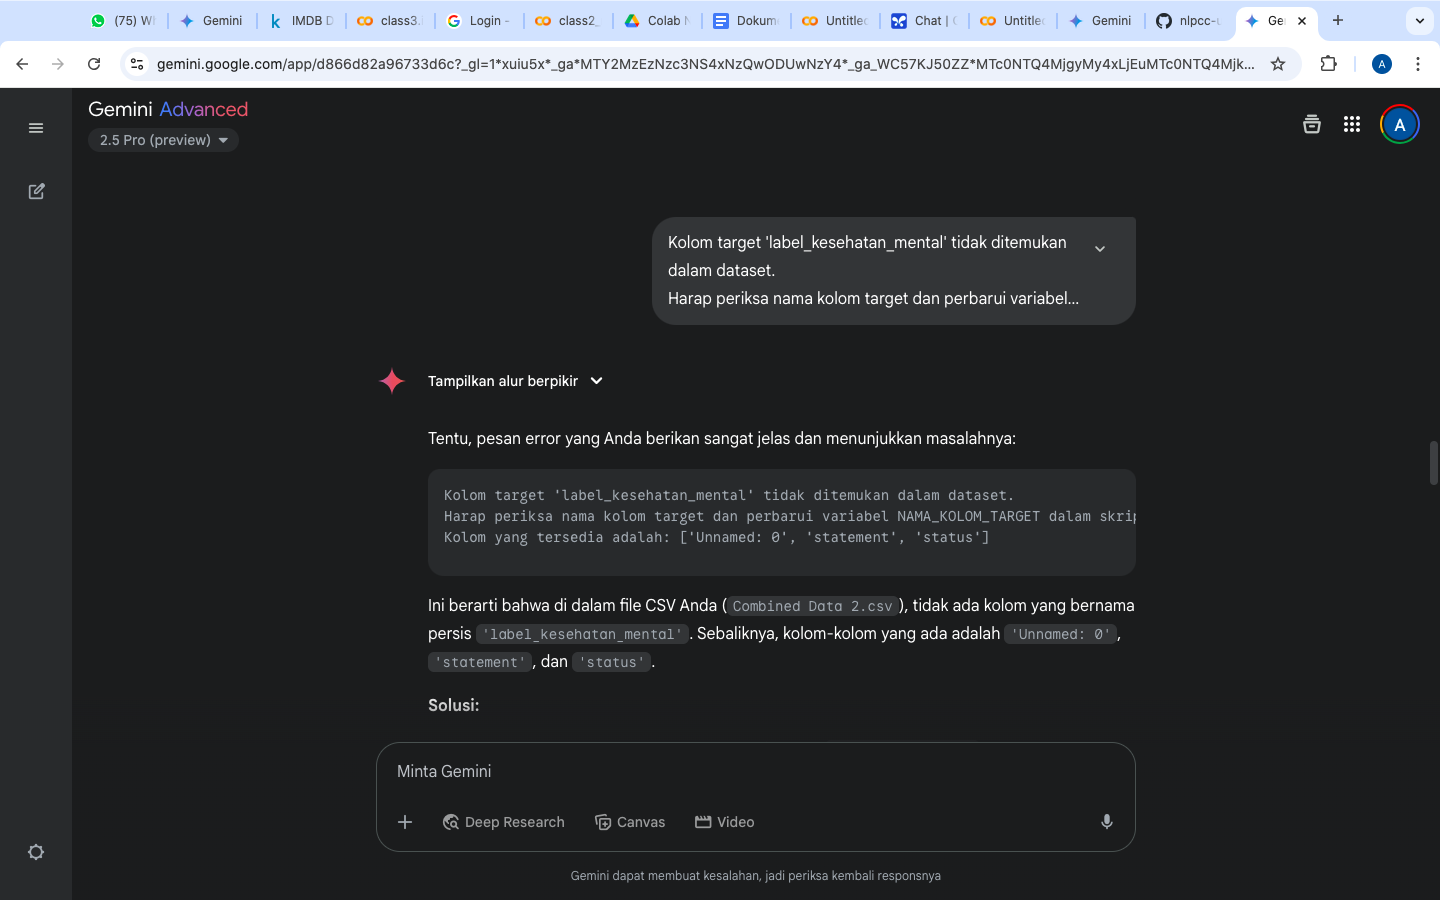

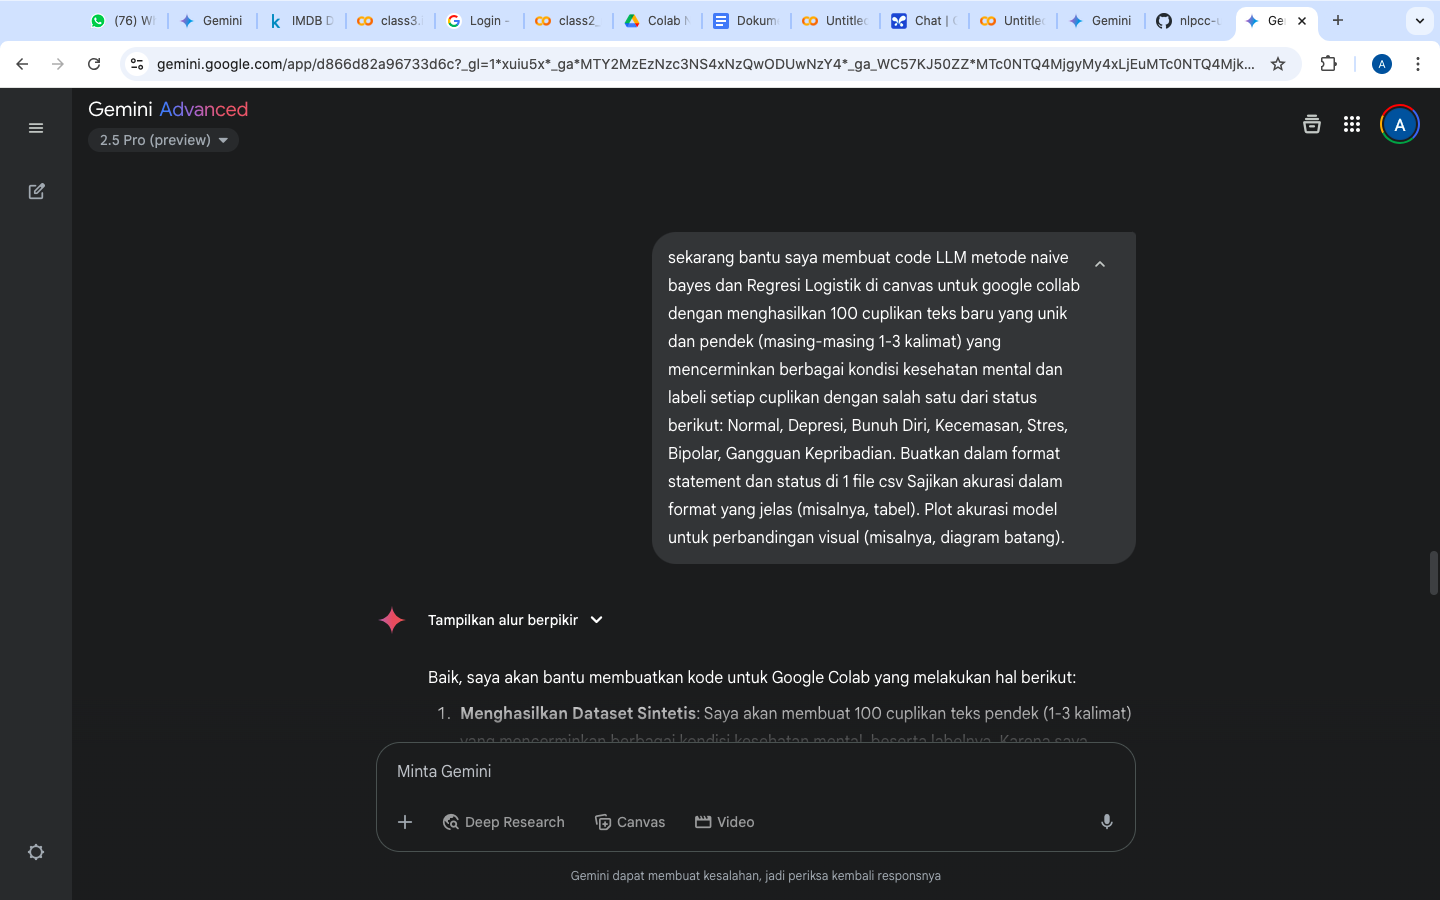